**CS 4099: ST: Graph Machine Learning**

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", and to delete the line `raise NotImplementedError()` (which are included to remind you in case you forget to solve one of the coding questions).

Do not forget to include your name below:

In [9]:
NAME = "Phong Cao"

---

# **CS4099 - Colab 3**

<font color='fucsia'>DUE: 11:59pm ET Thursday February 27</font>

Credits: This Colab is based on:
* MIT's 6.S191's Pytorch Intro Part 1.
* Stanford CS224W's Colabs 1 and 2.

# Copyright Information

In [ ]:
# Copyright 2025 MIT Introduction to Deep Learning. All Rights Reserved.
#
# Licensed under the MIT License. You may not use this file except in compliance
# with the License. Use and/or modification of this code outside of MIT Introduction
# to Deep Learning must reference:
#
# © MIT Introduction to Deep Learning
# http://introtodeeplearning.com
#

# Part I: Intro to PyTorch

In this lab, you'll get exposure to using PyTorch and learn how it can be used for deep learning. Go through the code and run each cell. Along the way, you'll encounter several ***TODO*** blocks -- follow the instructions to fill them out before running those cells and continuing.

## 0.1 Load PyTorch and other packages

[PyTorch](https://pytorch.org/) is a popular deep learning library known for its flexibility and ease of use. Here we'll learn how computations are represented and how to define a simple neural network in PyTorch.

In [10]:
import torch
import torch.nn as nn

# # Download and import the MIT Introduction to Deep Learning package
# !pip install mitdeeplearning --quiet
# import mitdeeplearning as mdl

import numpy as np
import matplotlib.pyplot as plt

## 0.2 What is PyTorch?

PyTorch is a machine learning library, like TensorFlow. At its core, PyTorch provides an interface for creating and manipulating [tensors](https://pytorch.org/docs/stable/tensors.html), which are data structures that you can think of as multi-dimensional arrays. Tensors are represented as n-dimensional arrays of base datatypes such as a string or integer -- they provide a way to generalize vectors and matrices to higher dimensions. PyTorch provides the ability to perform computation on these tensors, define neural networks, and train them efficiently.

The [```shape```](https://pytorch.org/docs/stable/generated/torch.Tensor.shape.html#torch.Tensor.shape) of a PyTorch tensor defines its number of dimensions and the size of each dimension. The `ndim` or [```dim```](https://pytorch.org/docs/stable/generated/torch.Tensor.dim.html#torch.Tensor.dim) of a PyTorch tensor provides the number of dimensions (n-dimensions) -- this is equivalent to the tensor's rank (as is used in TensorFlow), and you can also think of this as the tensor's order or degree.

Let’s start by creating some tensors and inspecting their properties:

In [11]:
integer = torch.tensor(1234)
decimal = torch.tensor(3.14159265359)

print(f"`integer` is a {integer.ndim}-d Tensor: {integer}")
print(f"`decimal` is a {decimal.ndim}-d Tensor: {decimal}")

`integer` is a 0-d Tensor: 1234
`decimal` is a 0-d Tensor: 3.1415927410125732


Vectors and lists can be used to create 1-d tensors:


In [12]:
fibonacci = torch.tensor([1, 1, 2, 3, 5, 8])
count_to_100 = torch.tensor(range(100))

print(f"`fibonacci` is a {fibonacci.ndim}-d Tensor with shape: {fibonacci.shape}")
print(f"`count_to_100` is a {count_to_100.ndim}-d Tensor with shape: {count_to_100.shape}")


`fibonacci` is a 1-d Tensor with shape: torch.Size([6])
`count_to_100` is a 1-d Tensor with shape: torch.Size([100])


## Question 1.1: Defining Tensors (1 point)

Next, let’s create 2-d (i.e., matrices) and higher-rank tensors. In image processing and computer vision, we will use 4-d Tensors with dimensions corresponding to batch size, number of color channels, image height, and image width.

In [13]:
### Defining higher-order Tensors ###

'''TODO: Define a 2-d Tensor. (1 line)'''
matrix = None
matrix = torch.tensor([[1,2], [3,4]])

assert isinstance(matrix, torch.Tensor), "matrix must be a torch Tensor object"
assert matrix.ndim == 2
print(f"matrix is a {matrix.ndim}-d Tensor with shape: {matrix.shape}")

'''TODO: Define a 4-d Tensor. (1 line)'''
# Use torch.zeros to initialize a 4-d Tensor of zeros with size 10 x 3 x 256 x 256.
#   You can think of this as 10 images where each image is RGB 256 x 256.
images = None
# YOUR CODE HERE
images = torch.zeros(10, 3, 256, 256)

assert isinstance(images, torch.Tensor), "images must be a torch Tensor object"
assert images.ndim == 4, "images must have 4 dimensions"
assert images.shape == (10, 3, 256, 256), "images is incorrect shape"
print(f"images is a {images.ndim}-d Tensor with shape: {images.shape}")

matrix is a 2-d Tensor with shape: torch.Size([2, 2])
images is a 4-d Tensor with shape: torch.Size([10, 3, 256, 256])


As you have seen, the `shape` of a tensor provides the number of elements in each tensor dimension. The `shape` is quite useful, and we'll use it often. You can also use slicing to access subtensors within a higher-rank tensor:

In [14]:
row_vector = matrix[1]
column_vector = matrix[:, 1]
scalar = matrix[0, 1]

print(f"`row_vector`: {row_vector}")
print(f"`column_vector`: {column_vector}")
print(f"`scalar`: {scalar}")

`row_vector`: tensor([3, 4])
`column_vector`: tensor([2, 4])
`scalar`: 2


## 1.2: Initializing Tensors

In some cases, we don't have to initialize tensors if all their values will be replaced (e.g., if this is a matrix that will store gradient values). This provides some small time savings.

In other cases, we may want to randomly initialize tensors. In particular, for parameter initialization, it is common to use the Gaussian Distribution.

## Question 1.2a: Non-initialized tensors (1 point).

First, you will create a matrix `grad` that has the same shape as `matrix`, but the parameters are not initialized (check documentation of `torch.empty` and `torch.empty_like`). FOR FULL MARKS, do not hard-code the shape.

In [16]:
'''TODO: Define a Tensor with the same shape as `matrix`. (1-2 lines)'''
grad = None
# YOUR CODE HERE
grad = torch.empty_like(matrix)
print(grad)
assert matrix.shape == grad.shape, "grad must have the same shape as matrix"

tensor([[4452450961952,             0],
        [            0,             0]])


## Question 1.2b: Randomly initialized tensors (1 point).

Initialize a matrix `W` with shape (20, 10) where each element is sampled from a Standard Gaussian distribution. Find the appropriate function in the documentation.

In [17]:
'''TODO: Initialize a Tensor from a Standard Gaussian. (1 line)'''
W = None
# YOUR CODE HERE

# Way 1:
W = torch.randn(20, 10)

# Way 2:
# W = torch.normal(mean=0, std=1, size=(20, 10))

assert W.shape == (20, 10), "W must have the correct shape"
print(W)

tensor([[ 0.7437, -2.0438, -1.2827, -1.4402, -0.1276, -0.1882,  1.6163, -1.0897,
          0.0101,  0.8362],
        [ 1.2051, -0.0683, -0.4875, -0.4971,  1.4690,  0.0375,  0.4210, -1.7431,
         -1.6584,  1.7252],
        [ 1.3536,  1.6513, -0.0177, -1.2269,  0.6357, -0.7775, -0.0557, -0.0443,
          2.0859,  0.1051],
        [ 0.0199, -0.6802,  1.1557, -1.0234,  0.9199,  1.3019,  0.9390,  0.8462,
          0.2809, -1.3055],
        [ 1.6396, -1.9154, -1.8657, -0.6708,  0.0423, -0.5353,  0.6595,  0.3424,
         -2.1762, -1.2711],
        [ 0.3710, -0.2658, -0.1624,  1.7706,  2.3947, -1.0720, -1.2375,  1.1541,
          0.8352,  1.7608],
        [ 0.0344,  1.1384,  1.6472, -0.3850,  0.5188,  0.0342,  1.0575,  0.1753,
         -1.0062,  0.8582],
        [ 0.4574, -0.6303,  0.3388, -0.7186, -0.5009,  0.7134,  2.3605, -0.1826,
          0.5411, -0.7188],
        [-0.1218,  0.3274, -1.0497,  0.2502,  1.7113,  0.9126, -0.2896, -0.1995,
         -0.4237, -0.0769],
        [ 0.5362,  

## Question 1.2c [ISU ONLY]: Scaling the standard deviation by the number of inputs (1 point).

In deep learning, we try to control the magnitude of the elements resulting from multiplications such as $\mathbf{h}^\top \mathbf{W}$ by adjusting the standard deviation of the Gaussian used for initializing $\mathbf{W}$.

In particular, an effective weight matrix initialization strategy is to set the standard deviation to be $1/\sqrt{d_{h}}$ where $d_{h}$ is the dimension of the inputs $h$ passed to this neural net layer.

Hint: When you divide a random variable by a real-value $c$, its standard deviation is reduced by a factor of $c$.

Once again, you will initialize a matrix `W`, but now you need to account for the shape of the other operands being used in the computation $\mathbf{h}^\top \mathbf{W} + \mathbf{b}$.

In [ ]:
'''TODO: Initialize a Tensor using the strategy above. (1 line)'''
W = None
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
h = torch.ones((16,1))
b = torch.zeros((1,8))

z = torch.matmul(W, h) + b

## Question 1.3 [ISU ONLY]: Indexing with boolean (2 points)

In some cases, we need to slice a Tensor based on a given criterion. The rows that satify this criterion can be indicated by a Boolean Tensor.

In the following example, find the rows of Tensor W whose sum is positive. Next, create a new Tensor containing only these rows.

In [ ]:
''' TODO: find the rows of Tensor W whose sum is positive. (1 line)'''

ind_pos_rows = None
# YOUR CODE HERE
raise NotImplementedError()

'''Next, create a new Tensor containing only these rows. (1 line)'''
pos_rows = None
# YOUR CODE HERE
raise NotImplementedError()

print(f"The number of positive rows of W is:\n{pos_rows.shape[0]}")

## 1.4 Computations on Tensors

A convenient way to think about and visualize computations in a machine learning framework like PyTorch is in terms of graphs. We can define this graph in terms of tensors, which hold data, and the mathematical operations that act on these tensors in some order. Let's look at a simple example, and define this computation using PyTorch:

![alt text](https://raw.githubusercontent.com/MITDeepLearning/introtodeeplearning/2025/lab1/img/add-graph.png)

In [18]:
# Create the nodes in the graph and initialize values
a = torch.tensor(15)
b = torch.tensor(61)

# Add them!
c1 = torch.add(a, b)
c2 = a + b  # PyTorch overrides the "+" operation so that it is able to act on Tensors
print(f"c1: {c1}")
print(f"c2: {c2}")


c1: 76
c2: 76


Notice how we've created a computation graph consisting of PyTorch operations, and how the output is a tensor with value 76 -- we've just created a computation graph consisting of operations, and it's executed them and given us back the result.

Now let's consider a slightly more complicated example:

![alt text](https://raw.githubusercontent.com/MITDeepLearning/introtodeeplearning/2025/lab1/img/computation-graph.png)

Here, we take two inputs, `a, b`, and compute an output `e`. Each node in the graph represents an operation that takes some input, does some computation, and passes its output to another node.

## Question 1.4: Let's define a simple function in PyTorch to construct this computation function: (1 point)

In [19]:
### Defining Tensor computations ###

# Construct a simple computation function
def func(a, b):
    '''TODO: Define the operation for c, d, e. (3 lines)'''
    # YOUR CODE HERE
    c = torch.add(a, b)
    d = torch.subtract(b, 1)
    e = torch.multiply(c, d)
    
    return e


Now, we can call this function to execute the computation graph

In [20]:
# Consider example values for a,b
a, b = 1.5, 2.5
# Execute the computation
e_out = func(a, b)
print(f"e_out: {e_out}")

e_out: 6.0


## 1.5 Neural networks in PyTorch
We can also define neural networks in PyTorch. PyTorch uses [``torch.nn.Module``](https://pytorch.org/docs/stable/generated/torch.nn.Module.html), which serves as a base class for all neural network modules in PyTorch and thus provides a framework for building and training neural networks.

Let's consider the example of a simple perceptron defined by just one dense (aka fully-connected or linear) layer: $ y = \sigma(Wx + b) $, where $W$ represents a matrix of weights, $b$ is a bias, $x$ is the input, $\sigma$ is the sigmoid activation function, and $y$ is the output.

![alt text](https://raw.githubusercontent.com/MITDeepLearning/introtodeeplearning/2025/lab1/img/computation-graph-2.png)

We will use `torch.nn.Module` to define layers -- the building blocks of neural networks. Layers implement common neural networks operations. In PyTorch, when we implement a layer, we subclass `nn.Module` and define the parameters of the layer as attributes of our new class. We also define and override a function [``forward``](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.forward), which will define the forward pass computation that is performed at every step. All classes subclassing `nn.Module` should override the `forward` function.

## Question 1.5a: Defining a Dense Layer class. (2 points)

Let's write a dense layer class to implement a perceptron defined above.

In [21]:
### Defining a dense layer ###

# num_inputs: number of input nodes
# num_outputs: number of output nodes
# x: input to the layer

class OurDenseLayer(torch.nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(OurDenseLayer, self).__init__()
        # Define and initialize parameters: a weight matrix W and bias b
        # Note that the parameter initialize is random!
        self.W = torch.nn.Parameter(torch.randn(num_inputs, num_outputs))
        self.bias = torch.nn.Parameter(torch.randn(num_outputs))

    def forward(self, x):
        '''TODO: define the operation for z (hint: use torch.matmul). (1 line)'''
        # YOUR CODE HERE
        z = torch.matmul(x, self.W) + self.bias
        
        '''TODO: define the operation for out (hint: use torch.sigmoid). (1 line)'''
        # YOUR CODE HERE
        
        y = torch.sigmoid(z)
        
        return y


Now, let's test the output of our layer.

In [22]:
# Define a layer and test the output!
num_inputs = 2
num_outputs = 3
layer = OurDenseLayer(num_inputs, num_outputs)
x_input = torch.tensor([[1, 2.]])

y = layer(x_input)

print(f"input shape: {x_input.shape}")

print(f"output shape: {y.shape}")
print(f"output result: {y}")


input shape: torch.Size([1, 2])
output shape: torch.Size([1, 3])
output result: tensor([[0.1021, 0.2257, 0.9884]], grad_fn=<SigmoidBackward0>)


Conveniently, PyTorch has defined a number of ```nn.Modules``` (or Layers) that are commonly used in neural networks, for example a [```nn.Linear```](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) or [`nn.Sigmoid`](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html) module.

## Question 1.5b: Using the `Sequential` API. (2 points)

Now, instead of using a single ```Module``` to define our simple neural network, we'll use the  [`nn.Sequential`](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html) module from PyTorch and a single [`nn.Linear` ](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) layer to define our network. With the `Sequential` API, you can readily create neural networks by stacking together layers like building blocks.

In [23]:
### Defining a neural network using the PyTorch Sequential API ###

# define the number of inputs and outputs
n_input_nodes = 2
n_output_nodes = 3

# Define the model
'''TODO: Use the Sequential API to define a neural network with a
    single linear (dense!) layer, followed by non-linearity to compute z (2-4 lines)'''
model = None
# YOUR CODE HERE

model = (
    torch.nn.Sequential(
        torch.nn.Linear(n_input_nodes, n_output_nodes),
        torch.nn.Sigmoid()
    )
)

In [24]:
# Test the model with example input
x_input = torch.tensor([[1, 2.]])
model_output = model(x_input)
print(f"input shape: {x_input.shape}")
print(f"output shape: {y.shape}")
print(f"output result: {y}")

input shape: torch.Size([1, 2])
output shape: torch.Size([1, 3])
output result: tensor([[0.1021, 0.2257, 0.9884]], grad_fn=<SigmoidBackward0>)


## Question 1.5c: Subclassing `nn.Module` (2 points)

With PyTorch, we can create more flexible models by subclassing [`nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html). The `nn.Module` class allows us to group layers together flexibly to define new architectures.

As we saw earlier with `OurDenseLayer`, we can subclass `nn.Module` to create a class for our model, and then define the forward pass through the network using the `forward` function. Subclassing affords the flexibility to define custom layers, custom training loops, custom activation functions, and custom models. Let's define the same neural network model as above (i.e., Linear layer with an activation function after it), now using subclassing and using PyTorch's built in linear layer from `nn.Linear`.

In [25]:
### Defining a model using subclassing ###

class LinearWithSigmoidActivation(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(LinearWithSigmoidActivation, self).__init__()
        '''TODO: define a model with a single Linear layer and sigmoid activation. (2 lines)'''
        self.linear = nn.Linear(num_inputs, num_outputs)
        self.activation = nn.Sigmoid()

    def forward(self, inputs):
        linear_output = self.linear(inputs)
        output = self.activation(linear_output)
        return output


Let's test out our new model, using an example input, setting `n_input_nodes=2` and `n_output_nodes=3` as before.

In [26]:
n_input_nodes = 2
n_output_nodes = 3
model = LinearWithSigmoidActivation(n_input_nodes, n_output_nodes)
x_input = torch.tensor([[1, 2.]])
y = model(x_input)
print(f"input shape: {x_input.shape}")
print(f"output shape: {y.shape}")
print(f"output result: {y}")

input shape: torch.Size([1, 2])
output shape: torch.Size([1, 3])
output result: tensor([[0.4365, 0.6479, 0.3188]], grad_fn=<SigmoidBackward0>)


## Question 1.5d: Custom Layers (3 points)

Importantly, `nn.Module` affords us a lot of flexibility to define custom models. For example, we can use boolean arguments in the `forward` function to specify different network behaviors, for example different behaviors during training and inference. Let's suppose under some instances we want our network to simply output the input, without any perturbation. We define a boolean argument `isidentity` to control this behavior:

In [27]:
### Custom behavior with subclassing nn.Module ###

class LinearButSometimesIdentity(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(LinearButSometimesIdentity, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)

    '''TODO: Implement the behavior where the network outputs the input, unchanged,
        under control of the isidentity argument. (3-4 lines)'''
    def forward(self, inputs, isidentity=False):
      # YOUR CODE HERE
      if isidentity == True:
        return inputs
      else:
        return self.linear(inputs)

## Question 1.5e: Let's test this behavior: (2 points)

In [28]:
# Test the IdentityModel
model = LinearButSometimesIdentity(num_inputs=2, num_outputs=3)
x_input = torch.tensor([[1, 2.]])

out_with_linear = None
out_with_identity = None

'''TODO: pass the input into the model and call with and without the input identity option. (2 lines)'''
# YOUR CODE HERE
out_with_linear = model(x_input)
out_with_identity = model(x_input, isidentity=True)

print(f"input: {x_input}")
print("Network linear output: {}; network identity output: {}".format(out_with_linear, out_with_identity))

input: tensor([[1., 2.]])
Network linear output: tensor([[-0.9206, -1.1795, -0.1477]], grad_fn=<AddmmBackward0>); network identity output: tensor([[1., 2.]])


## [ISU STUDENTS ONLY] Question 1.6: Debugging (3 points)

What is the problem with the code below? Explain in writting one way to fix it (2-3 sentences; edits to the code won't be checked).

YOUR ANSWER HERE

In [ ]:
class TwoLayerModel(nn.Module):
    def __init__(self, num_inputs, num_hidden, num_outputs):
        super(TwoLayerModel, self).__init__()
        self.layer1 = LinearButSometimesIdentity(num_inputs, num_hidden)
        self.layer2 = LinearButSometimesIdentity(num_hidden, num_outputs)
        self.activation = nn.Sigmoid()

    def forward(self, inputs):
        x = self.layer1(inputs, isidentity=True)
        x = self.activation(x)
        x = self.layer2(x)
        return x

model = TwoLayerModel(2, 3, 1)
x_input = torch.tensor([[1, 2.]])
out = model(x_input)


print(f"input: {x_input}")
print("Network linear output: {}".format(out))

# Part II: Node Embeddings




In this Colab, we will write a full pipeline for **learning node embeddings**.
We will go through the following 3 steps.

To start, we will load a classic graph in network science, the [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). We will explore multiple graph statistics for that graph.

We will then work together to transform the graph structure into a PyTorch tensor, so that we can perform machine learning over the graph.

Finally, we will finish the first learning algorithm on graphs: a node embedding model. For simplicity, our model here is simpler than DeepWalk / node2vec algorithms taught in the lecture. But it's still rewarding and challenging, as we will write it from scratch via PyTorch.

Now let's get started! This Colab should take 1-2 hours to complete.

**Note**: Make sure to **restart and run all** before submission, so that the intermediate variables / packages will carry over to the next cell

## Setup
We will heavily use NetworkX in this Colab.

In [29]:
import networkx as nx

## Zachary's karate club network

The [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) is a graph which describes a social network of 34 members of a karate club and documents links between members who interacted outside the club.

In [30]:
G = nx.karate_club_graph()

# G is an undirected graph
type(G)

networkx.classes.graph.Graph

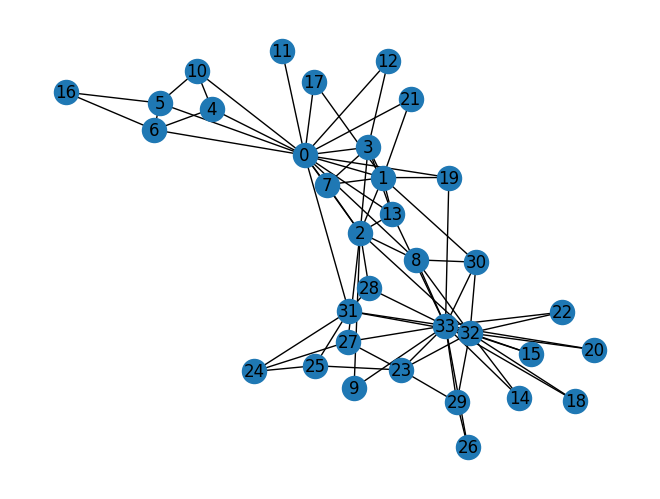

In [31]:
# Visualize the graph
nx.draw(G, with_labels = True)

## 2.1 Graph to Tensor
We will then work together to transform the graph $G$ into a PyTorch tensor, so that we can perform machine learning over the graph.

### Setup
Check if PyTorch is properly installed

In [32]:
import torch
print(torch.__version__)

2.5.1+cu121


### PyTorch tensor basics

We can generate PyTorch tensor with all zeros, ones or random values.

In [33]:
# Generate 3 x 4 tensor with all ones
ones = torch.ones(3, 4)
print(ones)

# Generate 3 x 4 tensor with all zeros
zeros = torch.zeros(3, 4)
print(zeros)

# Generate 3 x 4 tensor with random values on the interval [0, 1)
random_tensor = torch.rand(3, 4)
print(random_tensor)

# Get the shape of the tensor
print(ones.shape)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0.2958, 0.1898, 0.3947, 0.9712],
        [0.4389, 0.0791, 0.8923, 0.6217],
        [0.5868, 0.5858, 0.8488, 0.2723]])
torch.Size([3, 4])


PyTorch tensor contains elements for a single data type, the `dtype`.

In [34]:
# Create a 3 x 4 tensor with all 32-bit floating point zeros
zeros = torch.zeros(3, 4, dtype=torch.float32)
print(zeros.dtype)

# Change the tensor dtype to long (64-bit integer)
zeros = zeros.type(torch.long)
print(zeros.dtype)

torch.float32
torch.int64


## Question 2.1a: Get the edge list of the karate club network and transform it into `torch.LongTensor` named `pos_edge_index` (for 'positive' edge list). What is the `torch.sum` value of `pos_edge_index` tensor? (2 points)

Note: The sum in this case does not have interpretation. We ask this just to make grading easier.

In [35]:
def graph_to_edge_list(G):
  # TODO: Implement the function that returns the edge list of
  # an nx.Graph. The returned edge_list should be a list of tuples
  # where each tuple is a tuple representing an edge connected
  # by two nodes (1-2 lines)

  edge_list = []


# YOUR CODE HERE
  edge_list = list(G.edges())

  return edge_list

def edge_list_to_tensor(edge_list):
  # TODO: Implement the function that transforms the edge_list to
  # tensor. The input edge_list is a list of tuples and the resulting
  # tensor should have the shape [2, len(edge_list)] (1-2 lines).

  # Note 1: You don't need to iteratively fill in the entries,
  # you can overwrite the variable

  edge_index = torch.tensor([])

# YOUR CODE HERE
  edge_index = torch.tensor(edge_list, dtype=torch.long).T

  return edge_index

pos_edge_list = graph_to_edge_list(G)
pos_edge_index = edge_list_to_tensor(pos_edge_list)
print("The pos_edge_index tensor has shape {}".format(pos_edge_index.shape))
print("The pos_edge_index tensor has sum value {}".format(torch.sum(pos_edge_index)))

The pos_edge_index tensor has shape torch.Size([2, 78])
The pos_edge_index tensor has sum value 2535


## Question 2.1b: Please implement following function that samples negative edges. Then answer which edges (edge_1 to edge_5) are the negative edges in the karate club network? (8 points)

"Negative" edges refer to the edges/links that do not exist in the graph. The term "negative" is borrowed from "negative sampling" in link prediction. It has nothing to do with the edge weights.

For example, given an edge (src, dst), you should check that neither (src, dst) nor (dst, src) are edges in the Graph. If these hold true, then it is a negative edge.

Hint: it is easier to use G than pos_edge_list.

In [36]:
import random
random.seed(4099)

# Which of following edges can be negative ones?
edge_1 = (7, 1)
edge_2 = (1, 33)
edge_3 = (33, 22)
edge_4 = (0, 4)
edge_5 = (4, 2)

def can_be_negative(G, edge):
  # TODO: Implement the function that tests if an edge is a negative
  # edge in graph G (2-4 lines).

  is_negative = False
# YOUR CODE HERE
  if not G.has_edge(edge[0], edge[1]):
    is_negative = True
  else:
    is_negative = False
  return is_negative

print(f"Edge 1 can be a negative edge: {can_be_negative(G, edge_1)}")
print(f"Edge 2 can be a negative edge: {can_be_negative(G, edge_2)}")
print(f"Edge 3 can be a negative edge: {can_be_negative(G, edge_3)}")
print(f"Edge 4 can be a negative edge: {can_be_negative(G, edge_4)}")
print(f"Edge 5 can be a negative edge: {can_be_negative(G, edge_5)}")

def sample_negative_edges(G, num_neg_samples):
  # TODO: Implement the function that returns a list of negative edges.
  # The number of sampled negative edges is num_neg_samples. DIFFERENTLY than
  # what we saw in class, we will not sample a fixed number of edges k for each
  # node. Rather, you will sample uniformly from the set of non-edges. You don't
  # need to consider the corner case when the number of possible negative edges
  # is less than num_neg_samples. It should be ok as long as your implementation
  # works on the karate club network. In this implementation, self loops should
  # not be considered as either a positive or negative edge. Also, notice that
  # the karate club network is an undirected graph, if (0, 1) is a positive
  # edge, do you think (1, 0) can be a negative one? (6-10 lines)

  neg_edge_list = []

# YOUR CODE HERE
  while len(neg_edge_list) < num_neg_samples:
    node_1 = random.randint(0, G.number_of_nodes()-1)
    node_2 = random.randint(0, G.number_of_nodes()-1)
    edge = (node_1, node_2)

    if can_be_negative(G, edge):
      neg_edge_list.append(edge)
  return neg_edge_list

# Sample 78 negative edges
neg_edge_list = sample_negative_edges(G, len(pos_edge_list))


# Transform the negative edge list to tensor
neg_edge_index = edge_list_to_tensor(neg_edge_list)
print("The neg_edge_index tensor has shape {}".format(neg_edge_index.shape))

Edge 1 can be a negative edge: False
Edge 2 can be a negative edge: True
Edge 3 can be a negative edge: False
Edge 4 can be a negative edge: False
Edge 5 can be a negative edge: True
The neg_edge_index tensor has shape torch.Size([2, 78])


## Question 2.2 [ISU STUDENTS ONLY]: Reimplement the function `sample_negative_edges` so that the node selection probability is proportional to its degree (for one of the end points). (7 points)

In [ ]:
def sample_negative_edges_propto_degree(G, num_neg_samples):
  # Q2.2 (7-10 lines)
  neg_edge_list = []

# YOUR CODE HERE
raise NotImplementedError()

  return neg_edge_list

# Sample 78 negative edges
neg_edge_list = sample_negative_edges_propto_degree(G, len(pos_edge_list))


## 2.3 Node Emebedding Learning

Finally, we will finish the first learning algorithm on graphs: a node embedding model.


### Setup

In [37]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

print(torch.__version__)

2.5.1+cu121


To write our own node embedding learning methods, we'll heavily use the [`nn.Embedding`](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html) module in PyTorch. Let's see how to use `nn.Embedding`:

In [38]:
# Initialize an embedding layer
# Suppose we want to have embedding for 4 items (e.g., nodes)
# Each item is represented with 8 dimensional vector

emb_sample = nn.Embedding(num_embeddings=4, embedding_dim=8)
print('Sample embedding layer: {}'.format(emb_sample))


Sample embedding layer: Embedding(4, 8)


We can select items from the embedding matrix, by using Tensor indices

In [39]:
# Select an embedding in emb_sample
id = torch.LongTensor([1])
print(emb_sample(id))

# Select multiple embeddings
ids = torch.LongTensor([1, 3])
print(emb_sample(ids))

# Get the shape of the embedding weight matrix
shape = emb_sample.weight.data.shape
print(shape)

# Overwrite the weight to tensor with all ones
emb_sample.weight.data = torch.ones(shape)

# Let's check if the emb is indeed initialized
ids = torch.LongTensor([0, 3])
print(emb_sample(ids))

tensor([[ 1.8376,  2.3723, -0.1036, -0.2067, -0.1620, -1.8258, -0.3009, -0.0459]],
       grad_fn=<EmbeddingBackward0>)
tensor([[ 1.8376,  2.3723, -0.1036, -0.2067, -0.1620, -1.8258, -0.3009, -0.0459],
        [-1.0552, -0.8953,  1.0290,  0.6037,  1.5467,  0.9817, -0.1557,  0.2671]],
       grad_fn=<EmbeddingBackward0>)
torch.Size([4, 8])
tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]], grad_fn=<EmbeddingBackward0>)


## Question 2.3a: Now, it's your time to create node embedding matrix for the graph we have! (2 points)
- We want to have **16 dimensional** vector for each node in the karate club network.
- We want to initalize the matrix under **uniform distribution**, in the range of $[0, 1)$. We suggest you using [`torch.rand`](https://pytorch.org/docs/stable/generated/torch.rand.html).

In [41]:
# Please do not change / reset the random seed
torch.manual_seed(1)

def create_node_emb(num_node=34, embedding_dim=16):
  # TODO: Implement this function that will create the node embedding matrix.
  # A torch.nn.Embedding layer will be returned. You do not need to change
  # the values of num_node and embedding_dim. The weight matrix of returned
  # layer should be initialized under uniform distribution (2 lines)
  emb = None

# YOUR CODE HERE
  emb = nn.Embedding(num_embeddings=num_node, embedding_dim=embedding_dim)
  emb.weight.data = torch.rand(num_node, embedding_dim)
  
  return emb

emb = create_node_emb()
ids = torch.LongTensor([0, 3])

# Print the embedding layer
print("Embedding: {}".format(emb))

# An example that gets the embeddings for node 0 and 3
print(emb(ids))

Embedding: Embedding(34, 16)
tensor([[0.2114, 0.7335, 0.1433, 0.9647, 0.2933, 0.7951, 0.5170, 0.2801, 0.8339,
         0.1185, 0.2355, 0.5599, 0.8966, 0.2858, 0.1955, 0.1808],
        [0.7486, 0.6546, 0.3843, 0.9820, 0.6012, 0.3710, 0.4929, 0.9915, 0.8358,
         0.4629, 0.9902, 0.7196, 0.2338, 0.0450, 0.7906, 0.9689]],
       grad_fn=<EmbeddingBackward0>)


## Visualize the initial node embeddings
One good way to understand an embedding matrix, is to visualize it in a 2D space.
Here, we have implemented an embedding visualization function for you.
We first do PCA to reduce the dimensionality of embeddings to a 2D space.
Then we visualize each point, colored by the community it belongs to.

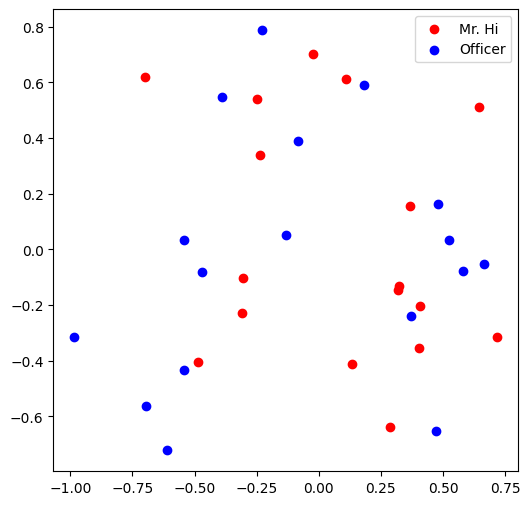

In [42]:
def visualize_emb(emb):
  X = emb.weight.data.numpy()
  pca = PCA(n_components=2)
  components = pca.fit_transform(X)
  plt.figure(figsize=(6, 6))
  club1_x = []
  club1_y = []
  club2_x = []
  club2_y = []
  for node in G.nodes(data=True):
    if node[1]['club'] == 'Mr. Hi':
      club1_x.append(components[node[0]][0])
      club1_y.append(components[node[0]][1])
    else:
      club2_x.append(components[node[0]][0])
      club2_y.append(components[node[0]][1])
  plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi")
  plt.scatter(club2_x, club2_y, color="blue", label="Officer")
  plt.legend()
  plt.show()

# Visualize the initial random embeddding
visualize_emb(emb)

## Question 2.3b: Training the embedding! What is the best performance you can get? (6 points)

We want to optimize our embeddings for the task of classifying edges as positive or negative. Given an edge and the embeddings for each node, the dot product of the embeddings, followed by a sigmoid, should give us the likelihood of that edge being either positive (output of sigmoid > 0.5) or negative (output of sigmoid < 0.5).

Note that we're using the functions you wrote in the previous questions, _as well as the variables initialized in previous cells_. If you're running into issues, make sure your answers to questions 1-6 are correct.

In [46]:
from torch.optim import SGD
import torch.nn as nn

def accuracy(pred, label):
  # TODO: Implement the accuracy function. This function takes the
  # pred tensor (the resulting tensor after sigmoid) and the label
  # tensor (torch.LongTensor). Predicted value greater than 0.5 will
  # be classified as label 1. Else it will be classified as label 0.
  # The returned accuracy should be rounded to 4 decimal places.
  # For example, accuracy 0.82956 will be rounded to 0.8296. (3-4 lines)
  

# YOUR CODE HERE
  pred = (pred > 0.5).long() # It got boolean type if pred > 0.5 and then convert to 0 and 1
  correct = (pred == label).sum().item()
  accu = (correct / len(label))
  
  
  return round(accu, 4)

def train(emb, loss_fn, train_label, train_edge):
  # TODO: Train the embedding layer here. You can also change epochs and
  # learning rate. In general, you need to implement (12+ lines):
  # (1) Get the embeddings of the nodes in train_edge
  # (2) Dot product the embeddings between each node pair
  # (3) Feed the dot product result into sigmoid
  # (4) Feed the sigmoid output into the loss_fn
  # (5) Print both loss and accuracy of each epoch
  # (6) Update the embeddings using the loss and optimizer
  # (as a sanity check, the loss should decrease during training)

  epochs = 500
  learning_rate = 0.1

  optimizer = SGD(emb.parameters(), lr=learning_rate, momentum=0.9)

  for i in range(epochs):

# YOUR CODE HERE
    optimizer.zero_grad()
    
    node_emb = emb(train_edge)
    dot_product = (node_emb[0] * node_emb[1]).sum(dim=1)
    pred = torch.sigmoid(dot_product)
    loss = loss_fn(pred, train_label)
    acc = accuracy(pred, train_label)
    
    loss.backward()
    optimizer.step()
    
    print(f"Epoch {i+1}/{epochs}, Loss: {loss.item():.4f}, Accuracy: {acc}")
    
  return emb

loss_fn = nn.BCELoss()

print(pos_edge_index.shape)

# Generate the positive and negative labels
pos_label = torch.ones(pos_edge_index.shape[1], )
neg_label = torch.zeros(neg_edge_index.shape[1], )

# Concat positive and negative labels into one tensor
train_label = torch.cat([pos_label, neg_label], dim=0)

# Concat positive and negative edges into one tensor
# Since the network is very small, we do not split the edges into val/test sets
train_edge = torch.cat([pos_edge_index, neg_edge_index], dim=1)
print(train_edge.shape)

train(emb, loss_fn, train_label, train_edge)

torch.Size([2, 78])
torch.Size([2, 156])
Epoch 1/500, Loss: 2.1942, Accuracy: 0.5
Epoch 2/500, Loss: 2.1791, Accuracy: 0.5
Epoch 3/500, Loss: 2.1506, Accuracy: 0.5
Epoch 4/500, Loss: 2.1105, Accuracy: 0.5
Epoch 5/500, Loss: 2.0605, Accuracy: 0.5
Epoch 6/500, Loss: 2.0023, Accuracy: 0.5
Epoch 7/500, Loss: 1.9375, Accuracy: 0.5
Epoch 8/500, Loss: 1.8677, Accuracy: 0.5
Epoch 9/500, Loss: 1.7943, Accuracy: 0.5
Epoch 10/500, Loss: 1.7186, Accuracy: 0.5
Epoch 11/500, Loss: 1.6417, Accuracy: 0.5
Epoch 12/500, Loss: 1.5648, Accuracy: 0.5
Epoch 13/500, Loss: 1.4889, Accuracy: 0.5
Epoch 14/500, Loss: 1.4146, Accuracy: 0.5
Epoch 15/500, Loss: 1.3429, Accuracy: 0.5
Epoch 16/500, Loss: 1.2742, Accuracy: 0.5
Epoch 17/500, Loss: 1.2090, Accuracy: 0.5
Epoch 18/500, Loss: 1.1477, Accuracy: 0.5
Epoch 19/500, Loss: 1.0905, Accuracy: 0.5
Epoch 20/500, Loss: 1.0375, Accuracy: 0.5
Epoch 21/500, Loss: 0.9887, Accuracy: 0.5
Epoch 22/500, Loss: 0.9441, Accuracy: 0.5
Epoch 23/500, Loss: 0.9034, Accuracy: 0.5
Ep

Embedding(34, 16)

## 2.4. Interpreting the training progress

In the previous question, you should see the accuracy should be 1.0 around epoch 150. Yet, the loss will continue to decrease after that. Based on this observation answer the questions below.

## Question 2.4a: Why does the loss continues to decrease after the accuracy converges to 1.0? (1-3 sentences; 2 points).

Accuracy reaching 1.0 means the model is classifying all edges correctly, but it only considers thresholded outputs > 0.5 is 1 and < 0.5 is 0. This does not fully reflect the quality of the learned embeddings. BCE Loss, on the other hand, evaluates confidence in predictions. Even after accuracy converges, the model continues improving embeddings, leading to a continued decrease in loss.

## Question 2.4b: Typically, an accuracy of 1.0 in training indicates overfitting. Why is this not a problem here? Think about the type of training or our goal in obtaining these embeddings. (1-2 sentences; 1 point).

Overfitting is not a problem here because our goal is to learn meaningful node embeddings, not just classify training edges. These embeddings capture structural relationships between nodes, allowing them to generalize beyond the training set for tasks like link prediction and clustering.

## Visualize the final node embeddings
Visualize your final embedding here!
You can visually compare the figure with the previous embedding figure.
After training, you should oberserve that the two classes are more evidently separated.
This is a great sanitity check for your implementation as well.

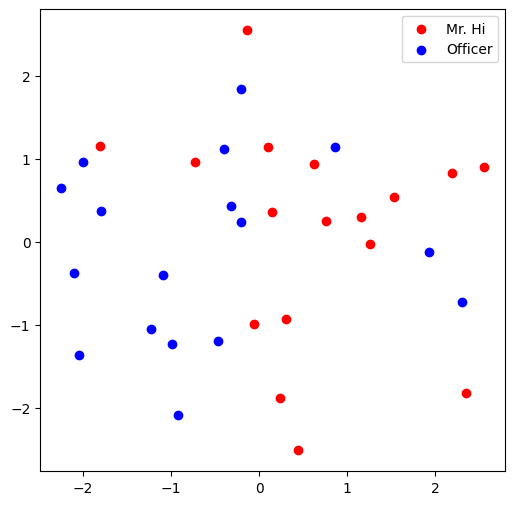

In [47]:
# Visualize the final learned embedding
visualize_emb(emb)

# Part III: GCN and PyTorch Geometric

In Part III, we will work to construct our own graph neural network using PyTorch Geometric (PyG) and then apply that model on two Open Graph Benchmark (OGB) datasets. These two datasets will be used to benchmark your model's performance on one graph-based tasks: node property prediction, predicting properties of single nodes.

First, we will learn how PyTorch Geometric stores graphs as PyTorch tensors.

Then, we will load and inspect one of the Open Graph Benchmark (OGB) datasets by using the `ogb` package. OGB is a collection of realistic, large-scale, and diverse benchmark datasets for machine learning on graphs. The `ogb` package not only provides data loaders for each dataset but also model evaluators.

Lastly, we will build our own graph neural network using PyTorch Geometric. We will then train and evaluate our model on the OGB node property prediction and graph property prediction tasks.

**Note**: Make sure to **sequentially run all the cells in each section**, so that the intermediate variables / packages will carry over to the next cell

We recommend you save a copy of this colab in your drive so you don't lose progress!

## Device
You might need to use a GPU for this Colab to run quickly. HOWEVER, you should start with a CPU node and make sure everything is working before you switch.

Please click `Runtime` and then `Change runtime type`. Then set the `hardware accelerator` to **GPU**.

## Setup
The installation of PyG on Colab can be a little bit tricky. First let us check which version of PyTorch you are running:

In [48]:
import torch
import os
print("PyTorch has version {}".format(torch.__version__))

PyTorch has version 2.5.1+cu121


In [49]:
!pip install torch==2.4.0

   ---------------------------------------- 0.0/197.8 MB ? eta -:--:--
    --------------------------------------- 4.7/197.8 MB 28.4 MB/s eta 0:00:07
   -- ------------------------------------- 10.7/197.8 MB 28.0 MB/s eta 0:00:07
   --- ------------------------------------ 16.5/197.8 MB 28.1 MB/s eta 0:00:07
   ---- ----------------------------------- 21.8/197.8 MB 27.5 MB/s eta 0:00:07
   ----- ---------------------------------- 26.7/197.8 MB 26.5 MB/s eta 0:00:07
   ------ --------------------------------- 32.0/197.8 MB 26.4 MB/s eta 0:00:07
   ------- -------------------------------- 37.7/197.8 MB 26.4 MB/s eta 0:00:07
   -------- ------------------------------- 42.7/197.8 MB 25.9 MB/s eta 0:00:06
   --------- ------------------------------ 46.7/197.8 MB 24.9 MB/s eta 0:00:07
   ---------- ----------------------------- 50.9/197.8 MB 24.5 MB/s eta 0:00:06
   ----------- ---------------------------- 55.3/197.8 MB 24.3 MB/s eta 0:00:06
   ------------ --------------------------- 59.5/1

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.5.1+cu121 requires torch==2.5.1+cu121, but you have torch 2.4.0 which is incompatible.
torchvision 0.20.1+cu121 requires torch==2.5.1+cu121, but you have torch 2.4.0 which is incompatible.


Download the necessary packages for PyG. Make sure that your version of torch matches the output from the cell above. In case of any issues, more information can be found on the [PyG's installation page](https://pytorch-geometric.readthedocs.io/en/latest/notes/installation.html).

In [50]:
# Install torch geometric
torch_version = str(torch.__version__)
scatter_src = f"https://pytorch-geometric.com/whl/torch-{torch_version}.html"
sparse_src = f"https://pytorch-geometric.com/whl/torch-{torch_version}.html"
!pip install torch-scatter -f $scatter_src
!pip install torch-sparse -f $sparse_src
!pip install torch-geometric
!pip install ogb

Looking in links: https://pytorch-geometric.com/whl/torch-2.5.1+cu121.html
     ---------------------------------------- 0.0/3.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.5 MB ? eta -:--:--
     ----------------------- ---------------- 2.1/3.5 MB 9.8 MB/s eta 0:00:01
     ---------------------------------------- 3.5/3.5 MB 13.0 MB/s eta 0:00:00
Looking in links: https://pytorch-geometric.com/whl/torch-2.5.1+cu121.html
     ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
     --------------- ------------------------ 0.8/2.1 MB 11.2 MB/s eta 0:00:01
     ---------------------------------------- 2.1/2.1 MB 14.6 MB/s eta 0:00:00
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached aiosignal-1.3.2-py2.py3-none-any.whl.metadata (3.8 kB)
  Using cached frozenlist-1.5.0-cp312-cp312-win_amd64.

## 3.1 PyTorch Geometric (Datasets and Data)


PyTorch Geometric has two classes for storing and/or transforming graphs into tensor format. One is `torch_geometric.datasets`, which contains a variety of common graph datasets. Another is `torch_geometric.data`, which provides the data handling of graphs in PyTorch tensors.

In this section, we will learn how to use `torch_geometric.datasets` and `torch_geometric.data` together.

## PyG Datasets

The `torch_geometric.datasets` class has many common graph datasets. Here we will explore its usage through one example dataset.

In [61]:
from torch_geometric.datasets import TUDataset

root = './enzymes'
name = 'ENZYMES'

# The ENZYMES dataset
pyg_dataset= TUDataset(root, name)

# You will find that there are 600 graphs in this dataset
print(pyg_dataset)

ENZYMES(600)


## Question 3.1a: What is the number of classes and number of features in the ENZYMES dataset? (2 points)

In [56]:
def get_num_classes(pyg_dataset):
  # TODO: Implement a function that takes a PyG dataset object
  # and returns the number of classes for that dataset.

  num_classes = 0

  ############# Your code here ############
  ## (~1 line of code)
  ## Note
  ## 1. Colab autocomplete functionality might be useful.
  # YOUR CODE HERE
  
  #########################################
  num_classes = pyg_dataset.num_classes
  return num_classes

def get_num_features(pyg_dataset):
  # TODO: Implement a function that takes a PyG dataset object
  # and returns the number of features for that dataset.

  num_features = 0

  ############# Your code here ############
  ## (~1 line of code)
  ## Note
  ## 1. Colab autocomplete functionality might be useful.
  # YOUR CODE HERE
  num_features = pyg_dataset.num_features
  #########################################

  return num_features

if 'IS_GRADESCOPE_ENV' not in os.environ:
  num_classes = get_num_classes(pyg_dataset)
  num_features = get_num_features(pyg_dataset)
  print("{} dataset has {} classes".format(name, num_classes))
  print("{} dataset has {} features".format(name, num_features))

ENZYMES dataset has 6 classes
ENZYMES dataset has 3 features


## PyG Data

Each PyG dataset stores a list of `torch_geometric.data.Data` objects, where each `torch_geometric.data.Data` object represents a graph. We can easily get the `Data` object by indexing into the dataset.

For more information such as what is stored in the `Data` object, please refer to the [documentation](https://pytorch-geometric.readthedocs.io/en/latest/modules/data.html#torch_geometric.data.Data).

## Question 3.1b: What is the label of the graph with index 100 in the ENZYMES dataset? (1 point)

In [64]:
# YOUR CODE HERE
graph_label = pyg_dataset[100].y.item()
print(graph_label)

4


## Question 3.1c: How many edges does the graph with index 200 have? (3 points)

In [66]:
def get_graph_num_edges(pyg_dataset, idx):
  # TODO: Implement a function that takes a PyG dataset object,
  # the index of a graph in the dataset, and returns the number of
  # edges in the graph (as an integer). You should not count an edge
  # twice if the graph is undirected. For example, in an undirected
  # graph G, if two nodes v and u are connected by an edge, this edge
  # should only be counted once.

  num_edges = 0

  ############# Your code here ############
  ## Note:
  ## 1. You can't return the data.num_edges directly
  ## 2. We assume the graph is undirected
  ## 3. Look at the PyG dataset built in functions
  ## (~3-4 lines of code)
  # YOUR CODE HERE
  data = pyg_dataset[idx]
  num_edges = data.edge_index.shape[1] // 2
  #########################################

  return num_edges

idx = 200
num_edges = get_graph_num_edges(pyg_dataset, idx)
print('Graph with index {} has {} edges'.format(idx, num_edges))

Graph with index 200 has 53 edges


## 3.2 Open Graph Benchmark (OGB)

The Open Graph Benchmark (OGB) is a collection of realistic, large-scale, and diverse benchmark datasets for machine learning on graphs. Its datasets are automatically downloaded, processed, and split using the OGB Data Loader. The model performance can then be evaluated by using the OGB Evaluator in a unified manner.

### Dataset and Data

OGB also supports PyG dataset and data classes. Here we take a look on the `ogbn-arxiv` dataset.

In [67]:
import torch_geometric.transforms as T
from ogb.nodeproppred import PygNodePropPredDataset

if 'IS_GRADESCOPE_ENV' not in os.environ:
  dataset_name = 'ogbn-arxiv'
  # Load the dataset and transform it to sparse tensor
  dataset = PygNodePropPredDataset(name=dataset_name,
                                  transform=T.ToSparseTensor())
  print('The {} dataset has {} graph'.format(dataset_name, len(dataset)))

  # Extract the graph
  data = dataset[0]
  print(data)

Downloaded 0.08 GB: 100%|██████████| 81/81 [00:25<00:00,  3.22it/s]
Processing...


Extracting dataset\arxiv.zip
Loading necessary files...
This might take a while.
Processing graphs...


100%|██████████| 1/1 [00:00<?, ?it/s]


Converting graphs into PyG objects...


100%|██████████| 1/1 [00:00<00:00, 331.78it/s]

Saving...
The ogbn-arxiv dataset has 1 graph



Done!
c:\Study\Graph ML\GraphML\.venv\Lib\site-packages\ogb\nodeproppred\dataset_pyg.py:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.data, self.slices = torch.loa

Data(num_nodes=169343, x=[169343, 128], node_year=[169343, 1], y=[169343, 1], adj_t=[169343, 169343, nnz=1166243])


## Question 3.2: How many features are in the ogbn-arxiv graph? (1 point)

In [68]:
def graph_num_features(data):
  # TODO: Implement a function that takes a PyG data object,
  # and returns the number of features in the graph (as an integer).

  num_features = 0

  ############# Your code here ############
  ## (~1 line of code)
  # YOUR CODE HERE
  num_features = data.x.shape[1]
  
  #########################################

  return num_features

if 'IS_GRADESCOPE_ENV' not in os.environ:
  num_features = graph_num_features(data)
  print('The graph has {} features'.format(num_features))

The graph has 128 features


## 3.3 GNN: Node Property Prediction

In this section we will build our first graph neural network using PyTorch Geometric. Then we will apply it to the task of node property prediction (node classification).

Specifically, we will use GCN as the foundation for your graph neural network ([Kipf et al. (2017)](https://arxiv.org/pdf/1609.02907.pdf)). To do so, we will work with PyG's built-in `GCNConv` layer.

## Setup

In [70]:
import torch
import pandas as pd
import torch.nn.functional as F
print(torch.__version__)

# The PyG built-in GCNConv
from torch_geometric.nn import GCNConv

import torch_geometric.transforms as T
from ogb.nodeproppred import PygNodePropPredDataset, Evaluator

2.5.1+cu121


## Load and Preprocess the Dataset

In [71]:
if 'IS_GRADESCOPE_ENV' not in os.environ:
  dataset_name = 'ogbn-arxiv'
  dataset = PygNodePropPredDataset(name=dataset_name,
                                  transform=T.Compose(
                                      [T.ToUndirected(),
                                       T.ToSparseTensor()]))
  data = dataset[0]

  # # Make the adjacency matrix to symmetric
  # data.adj_t = data.adj_t.to_symmetric()

  device = 'cuda' if torch.cuda.is_available() else 'cpu'

  # If you use GPU, the device should be cuda
  print('Device: {}'.format(device))

  data = data.to(device)
  split_idx = dataset.get_idx_split()
  train_idx = split_idx['train'].to(device)

c:\Study\Graph ML\GraphML\.venv\Lib\site-packages\ogb\nodeproppred\dataset_pyg.py:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.data, self.slices = torch.load(self.

Device: cuda


In [158]:
print(f"Dataset Name: {dataset_name}")
print(f"Number of graphs: {len(dataset)}")  # Should be 1 since OGB datasets are usually one large graph
print(f"Graph Structure:\n{data}")  # Print dataset object
print(f"Graph Features:\n{data.x}")  # Print node features
print(f"Graph Labels:\n{data.y}")  # Print node labels
print(f"Graph Edge Index:\n{data.edge_index}")  # Print edge indices


Dataset Name: ogbn-arxiv
Number of graphs: 1
Graph Structure:
Data(num_nodes=169343, x=[169343, 128], node_year=[169343, 1], y=[169343, 1], adj_t=[169343, 169343, nnz=2315598])
Graph Features:
tensor([[-0.0579, -0.0525, -0.0726,  ...,  0.1734, -0.1728, -0.1401],
        [-0.1245, -0.0707, -0.3252,  ...,  0.0685, -0.3721, -0.3010],
        [-0.0802, -0.0233, -0.1838,  ...,  0.1099,  0.1176, -0.1399],
        ...,
        [-0.2205, -0.0366, -0.4022,  ...,  0.1134, -0.1614, -0.1452],
        [-0.1382,  0.0409, -0.2518,  ..., -0.0893, -0.0413, -0.3761],
        [-0.0299,  0.2684, -0.1611,  ...,  0.1208,  0.0776, -0.0910]],
       device='cuda:0')
Graph Labels:
tensor([[ 4],
        [ 5],
        [28],
        ...,
        [10],
        [ 4],
        [ 1]], device='cuda:0')
Graph Edge Index:
None


## Question 3.3a: GCN Model (7 points)

Now we will implement our GCN model!

Please follow the figure below to implement the `forward` function.


![test](https://drive.google.com/uc?id=128AuYAXNXGg7PIhJJ7e420DoPWKb-RtL)

In [ ]:
from torch_geometric.nn import GraphNorm

class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers,
                 dropout, return_embeds=False):
        # TODO: Implement a function that initializes self.convs,
        # self.bns, and self.softmax.

        super(GCN, self).__init__()

        # A list of GCNConv layers
        self.convs = None

        # A list of 1D batch normalization layers
        self.bns = None

        # The log softmax layer
        self.softmax = None

        ############# Your code here ############
        ## Note:
        ## 1. You should use torch.nn.ModuleList for self.convs and self.bns
        ## 2. self.convs has num_layers GCNConv layers
        ## 3. self.bns has num_layers - 1 BatchNorm1d layers
        ## 4. You should use torch.nn.LogSoftmax for self.softmax
        ## 5. The parameters you can set for GCNConv include 'in_channels' and
        ## 'out_channels'. For more information please refer to the documentation:
        ## https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GCNConv
        ## 6. The only parameter you need to set for BatchNorm1d is 'num_features'
        ## For more information please refer to the documentation:
        ## https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html
        ## (~10 lines of code)
        # YOUR CODE HERE
        self.convs = torch.nn.ModuleList()
        self.convs.append(GCNConv(input_dim, hidden_dim))
        for i in range (num_layers - 2):
            self.convs.append(GCNConv(hidden_dim, hidden_dim))
        self.convs.append(GCNConv(hidden_dim, output_dim))
        #########################################
        
        # Old nomralization
        # self.bns = torch.nn.ModuleList([torch.nn.BatchNorm1d(hidden_dim) for _ in range(num_layers - 1)])
        
        # New normalization using GraphNorm
        self.bns = torch.nn.ModuleList([GraphNorm(hidden_dim) for _ in range(num_layers - 1)])

        

        self.softmax = torch.nn.LogSoftmax(dim=1)

        # Probability of an element getting zeroed
        self.dropout = dropout

        # Skip classification layer and return node embeddings
        self.return_embeds = return_embeds

    def reset_parameters(self):
        for conv in self.convs:
            conv.reset_parameters()
        for bn in self.bns:
            bn.reset_parameters()

    def forward(self, adj_t, x):
        # TODO: Implement a function that takes the feature tensor x and
        # edge_index tensor adj_t and returns the output tensor as
        # shown in the figure.

        out = None

        ############# Your code here ############
        ## Note:
        ## 1. Construct the network as shown in the figure
        ## 2. torch.nn.functional.relu and torch.nn.functional.dropout are useful
        ## For more information please refer to the documentation:
        ## https://pytorch.org/docs/stable/nn.functional.html
        ## 3. Don't forget to set F.dropout training to self.training
        ## 4. If return_embeds is True, then skip the last softmax layer
        ## (~8 lines of code; Colab auto-complete will make 1 mistake)
        # YOUR CODE HERE
        for i, conv in enumerate(self.convs[:-1]):
            x = conv(x, adj_t)
            x = self.bns[i](x)
            
            # Old activation
            x = F.leaky_relu(x)
            
            x = F.dropout(x, p=self.dropout, training=self.training)
            
        x = self.convs[-1](x, adj_t)
        
        if self.return_embeds:
            return x
        
        out = self.softmax(x)
        #########################################

        return out

In [188]:
def train(model, data, train_idx, optimizer, loss_fn):
    # TODO: Implement a function that trains the model by
    # using the given optimizer and loss_fn.
    model.train()
    loss = 0

    ############# Your code here ############
    ## Note:
    ## 1. Zero grad the optimizer
    ## 2. Feed the data into the model
    ## 3. Slice the model output and label by train_idx
    ## 4. Feed the sliced output and label to loss_fn
    ## (~3-5 lines of code)
    # YOUR CODE HERE
    optimizer.zero_grad()
    out = model(data.adj_t, data.x)
    loss = loss_fn(out[train_idx], data.y[train_idx].view(-1))

    #########################################

    loss.backward()
    optimizer.step()

    return loss.item()

In [189]:
# Test function here
@torch.no_grad()
def test(model, data, split_idx, evaluator, save_model_results=False):
    # TODO: Implement a function that tests the model by
    # using the given split_idx and evaluator.
    model.eval()

    # The output of model on all data
    out = None

    ############# Your code here ############
    ## (~1 line of code)
    ## Note:
    ## 1. No index slicing here
    # YOUR CODE HERE
    out = model(data.adj_t, data.x)
    #########################################

    y_pred = out.argmax(dim=-1, keepdim=True)

    train_acc = evaluator.eval({
        'y_true': data.y[split_idx['train']],
        'y_pred': y_pred[split_idx['train']],
    })['acc']
    valid_acc = evaluator.eval({
        'y_true': data.y[split_idx['valid']],
        'y_pred': y_pred[split_idx['valid']],
    })['acc']
    test_acc = evaluator.eval({
        'y_true': data.y[split_idx['test']],
        'y_pred': y_pred[split_idx['test']],
    })['acc']

    if save_model_results:
      print ("Saving Model Predictions")

      data = {}
      data['y_pred'] = y_pred.view(-1).cpu().detach().numpy()

      df = pd.DataFrame(data=data)
      # Save locally as csv
      df.to_csv('ogbn-arxiv_node.csv', sep=',', index=False)


    return train_acc, valid_acc, test_acc

In [190]:
# Old args
# Please do not change the args
if 'IS_GRADESCOPE_ENV' not in os.environ:
  args = {
      'device': device,
      'num_layers': 3,
      'hidden_dim': 256,
      'dropout': 0.3,
      'lr': 0.007,
      'epochs': 150,
  }
  args
  
  
# # New Optimize args
# if 'IS_GRADESCOPE_ENV' not in os.environ:
#   args = {
#       'device': device,
#       'num_layers': 4,      # Increase layers from 3 → 4
#       'hidden_dim': 512,    # Increase hidden dim from 256 → 512
#       'dropout': 0.3,       # Reduce dropout from 0.5 → 0.3
#       'lr': 0.005,          # Reduce learning rate from 0.01 → 0.005
#       'epochs': 150,        # Increase training epochs from 100 → 150
#   }
#   args


In [191]:
if 'IS_GRADESCOPE_ENV' not in os.environ:
  model = GCN(data.num_features, args['hidden_dim'],
              dataset.num_classes, args['num_layers'],
              args['dropout']).to(device)
  evaluator = Evaluator(name='ogbn-arxiv')

In [192]:
# Please do not change these args
# Training should take <10min using GPU runtime
import copy
if 'IS_GRADESCOPE_ENV' not in os.environ:
  # reset the parameters to initial random value
  model.reset_parameters()

  # Old optimizer
  # optimizer = torch.optim.Adam(model.parameters(), lr=args['lr'])
  
  # New optimizer
  # Add weight decay
  optimizer = torch.optim.Adam(model.parameters(), lr=args['lr'], weight_decay=5e-4)

  loss_fn = F.nll_loss

  best_model = None
  best_valid_acc = 0

  for epoch in range(1, 1 + args["epochs"]):
    loss = train(model, data, train_idx, optimizer, loss_fn)
    result = test(model, data, split_idx, evaluator)
    train_acc, valid_acc, test_acc = result
    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        best_model = copy.deepcopy(model)
    print(f'Epoch: {epoch:02d}, '
          f'Loss: {loss:.4f}, '
          f'Train: {100 * train_acc:.2f}%, '
          f'Valid: {100 * valid_acc:.2f}% '
          f'Test: {100 * test_acc:.2f}%')

Epoch: 01, Loss: 3.9642, Train: 46.04%, Valid: 44.32% Test: 40.33%
Epoch: 02, Loss: 2.2864, Train: 54.59%, Valid: 55.82% Test: 53.49%
Epoch: 03, Loss: 1.9018, Train: 58.70%, Valid: 58.37% Test: 56.04%
Epoch: 04, Loss: 1.6974, Train: 60.85%, Valid: 60.00% Test: 57.85%
Epoch: 05, Loss: 1.5782, Train: 62.08%, Valid: 62.49% Test: 61.53%
Epoch: 06, Loss: 1.4949, Train: 63.35%, Valid: 64.35% Test: 64.29%
Epoch: 07, Loss: 1.4279, Train: 64.18%, Valid: 65.19% Test: 65.36%
Epoch: 08, Loss: 1.3817, Train: 65.01%, Valid: 65.79% Test: 65.43%
Epoch: 09, Loss: 1.3371, Train: 65.76%, Valid: 65.91% Test: 64.84%
Epoch: 10, Loss: 1.2987, Train: 66.09%, Valid: 65.65% Test: 63.96%
Epoch: 11, Loss: 1.2746, Train: 66.37%, Valid: 65.68% Test: 63.92%
Epoch: 12, Loss: 1.2547, Train: 66.81%, Valid: 66.39% Test: 64.98%
Epoch: 13, Loss: 1.2333, Train: 67.30%, Valid: 67.21% Test: 66.37%
Epoch: 14, Loss: 1.2091, Train: 67.70%, Valid: 67.74% Test: 67.22%
Epoch: 15, Loss: 1.1890, Train: 68.03%, Valid: 68.08% Test: 67

## Question 3.3b: What are your `best_model` validation and test accuracies? (5 extra points)

Run the cell below to see the results of your best of model and save your model's predictions to a file named *ogbn-arxiv_node.csv*. You can view this file by clicking on the *Folder* icon on the left side pannel.

You can get up to 5 extra points for each percentual point of accuracy above 70% on the test set. For example: if you get 70.8%, this will be rounded to 71%, and you will get 1 extra point.

It is ALLOWED to change the hypers and the network architecture, as long as you are only using GCN, BatchNormalization and Dropout layers/ If you change any of these, write the corresponding code in a new cell below.

In [193]:
# YOUR CODE HERE
# Evaluate the best model on validation and test sets
best_train_acc, best_valid_acc, best_test_acc = test(best_model, data, split_idx, evaluator, save_model_results=True)

print(f"Best Model Validation Accuracy: {100 * best_valid_acc:.2f}%")
print(f"Best Model Test Accuracy: {100 * best_test_acc:.2f}%")



Saving Model Predictions
Best Model Validation Accuracy: 72.38%
Best Model Test Accuracy: 71.14%


In [194]:
torch.save(best_model.state_dict(), "best_model.pt")
print("✅ Model parameters saved successfully!")


✅ Model parameters saved successfully!


## Question 3.3c [ISU ONLY] : Reimplement the training loop with Early Stopping with a `patience` parameter (6 points)

In slide 67 of this [lecture](https://canvas.wpi.edu/courses/70386/files/folder/slides?preview=7291159) we covered the Early Stopping algorithm.

Instead of just stopping the training immediately after the validation loss goes up, use a variable `patience` to set the number of consecutive rounds in which the loss must increase before the training is stopped.

In [ ]:
# Please do not change these args
# Training should take <10min using GPU runtime
import copy

patience = 3

if 'IS_GRADESCOPE_ENV' not in os.environ:
  # reset the parameters to initial random value
  model.reset_parameters()

  optimizer = torch.optim.Adam(model.parameters(), lr=args['lr'])
  loss_fn = F.nll_loss

  best_model = None
  best_valid_acc = 0

  # TODO: start by copying the for loop from previous cell
  # Implement Early Stopping with patience (~6 new lines)
  # YOUR CODE HERE
  raise NotImplementedError()

# Submission

When you submit your assignment, you will have to download this file as an `.ipynb` file. Please name this file `CS4099_Colab_3.ipynb`.